In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix,r2_score


In [88]:
df = pd.read_csv("AirQualityUCI.csv",sep=";",decimal=",",low_memory=False)
df.head()   


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [89]:
df.shape

(9471, 17)

In [90]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [91]:
df = df.replace(-200,np.nan)

In [92]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [94]:
df = df.drop(columns=["Unnamed: 15","Unnamed: 16"])
df = df.dropna()
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB
None
(827, 15)


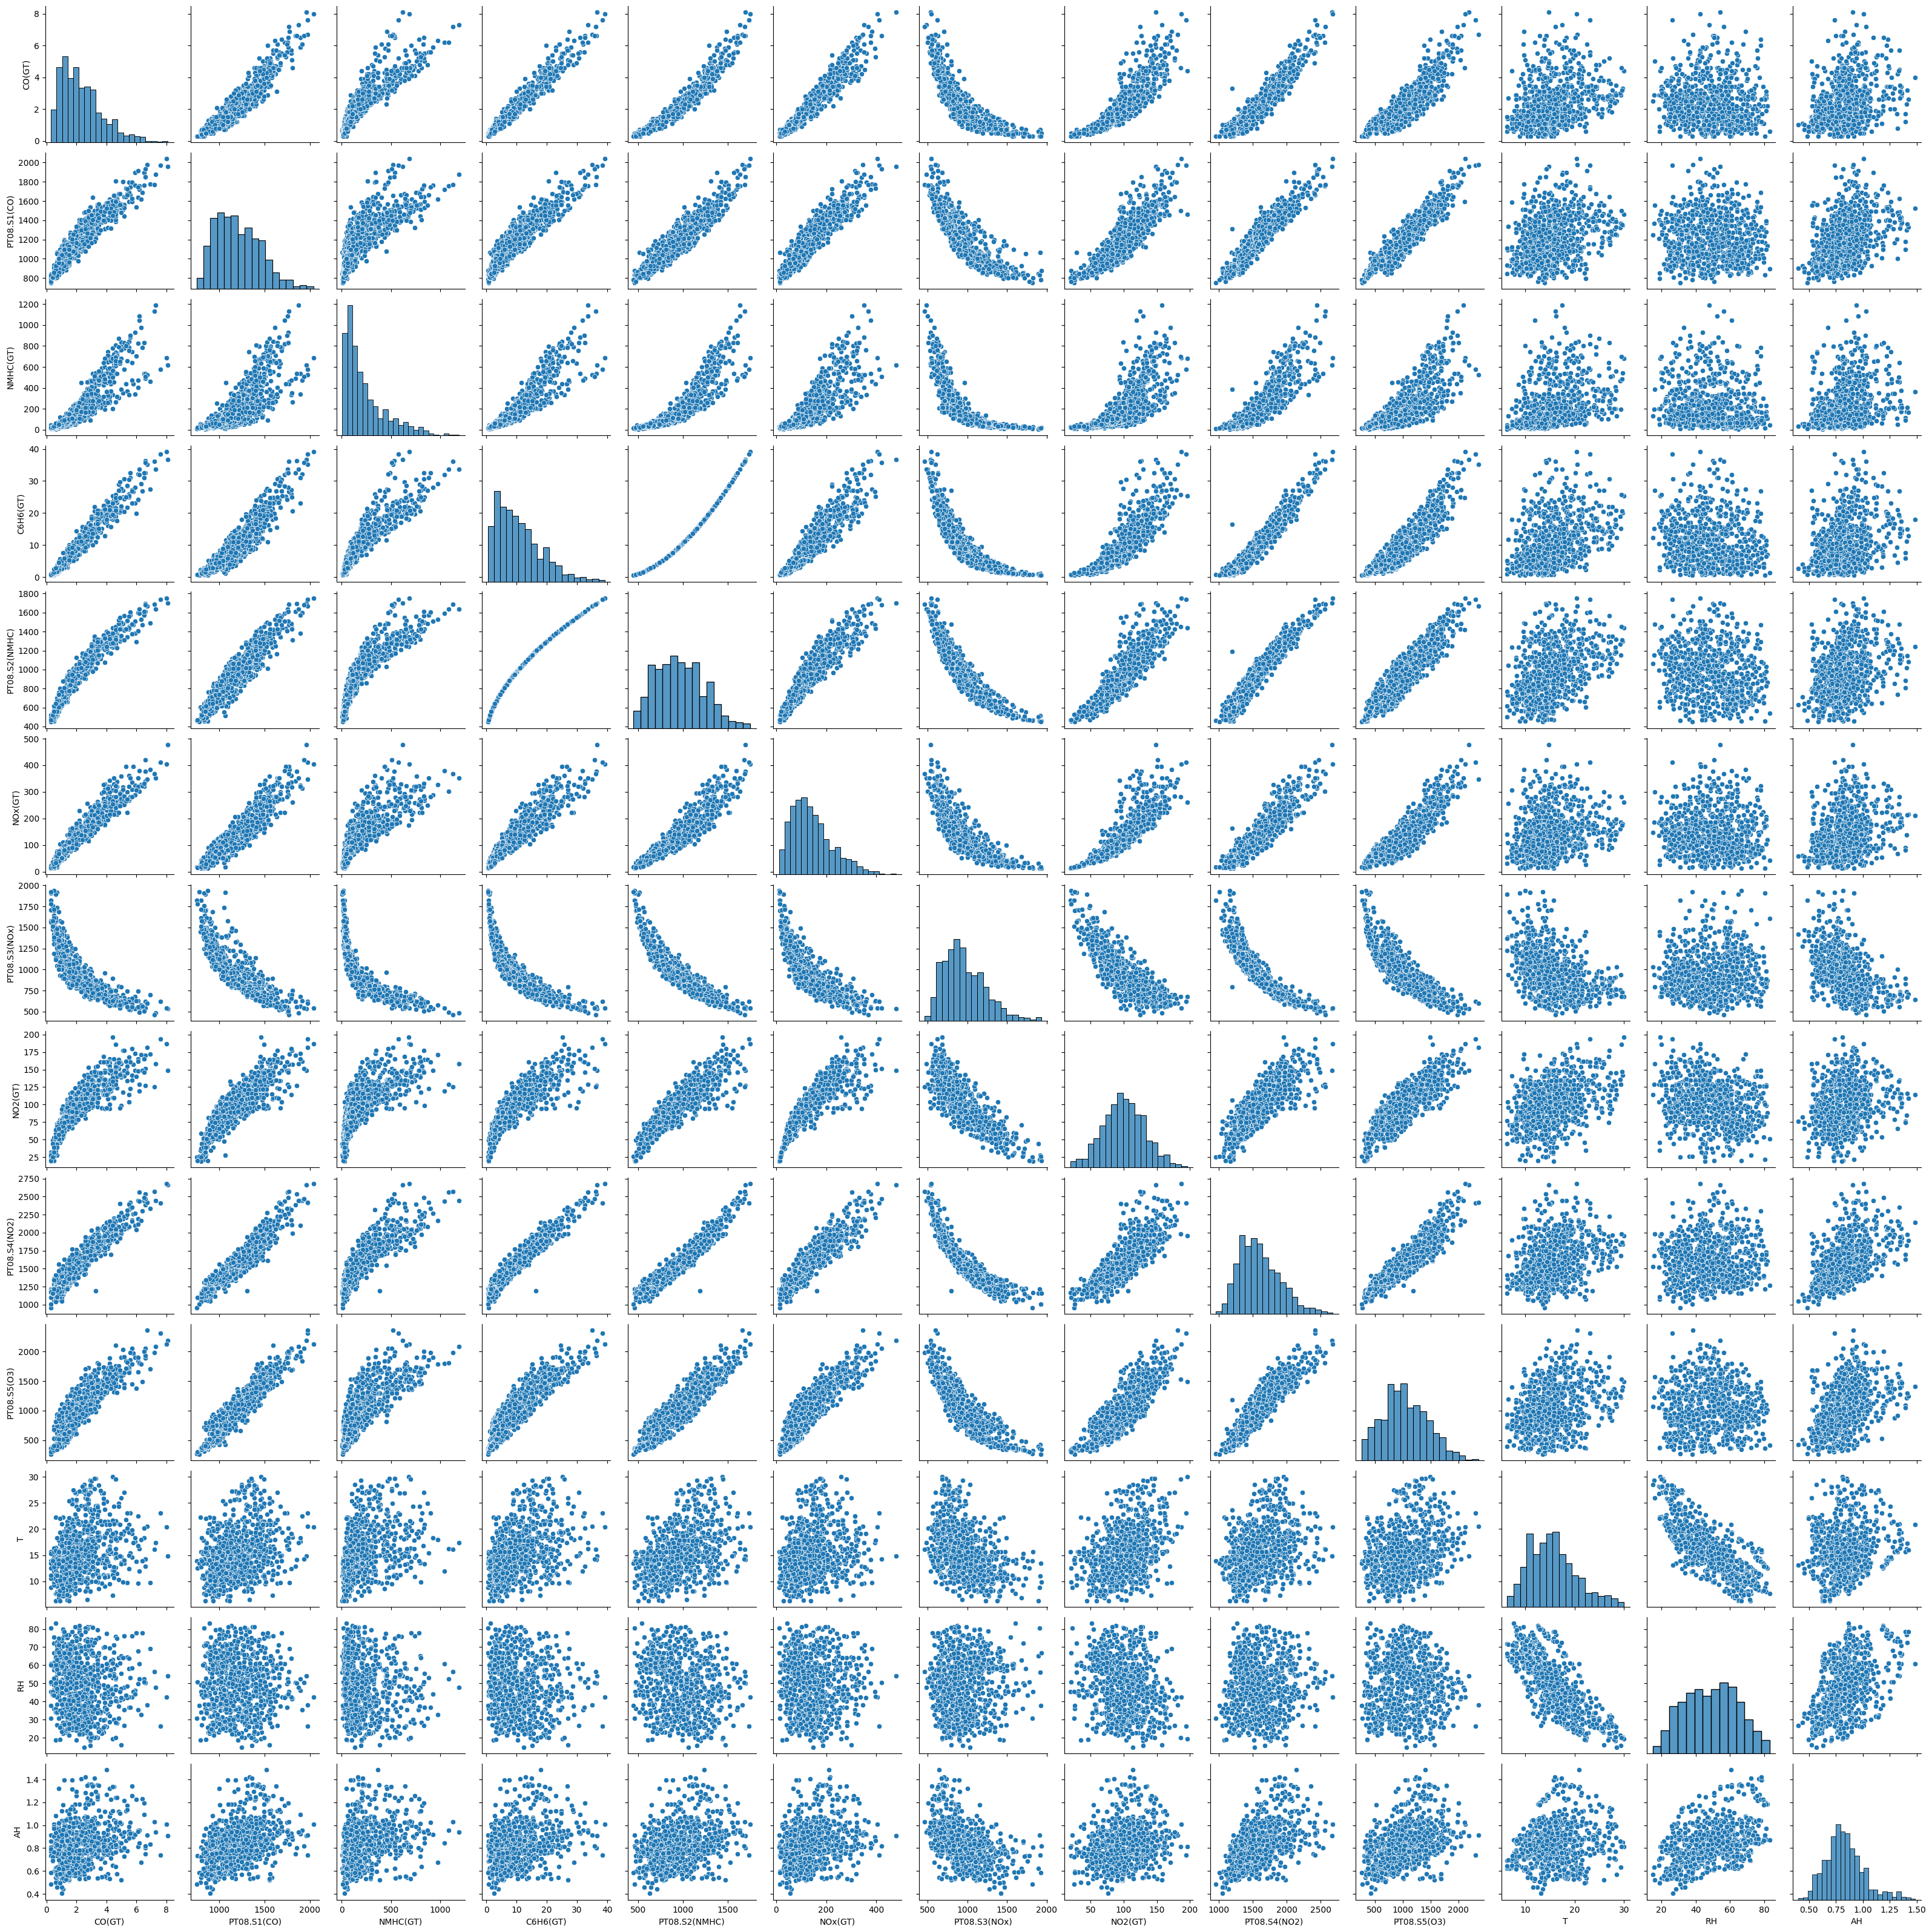

In [95]:
sns.pairplot(df)
plt.show()

In [96]:
x = df[['T', 'RH', 'AH', 
        'PT08.S1(CO)', 'PT08.S2(NMHC)', 
        'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

y = df[['CO(GT)', 'NO2(GT)', 'NMHC(GT)']]


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [98]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8783303966353667

In [99]:
predict= lr.predict(x)
y_pred = lr.predict(x_test)
print(predict)

[[  3.17348135 111.64814472 288.82446478]
 [  2.78711689 103.85687253 231.35508484]
 [  2.80463596 113.43480914 155.66451163]
 ...
 [  3.09676468 109.08900584 383.82767278]
 [  3.03214566 112.87501141 335.0666682 ]
 [  3.23093203 117.55282217 373.72525041]]


In [100]:
pred_df = pd.DataFrame(predict, columns=['Predicted_CO', 'Predicted_NO2', 'Predicted_NMHC'])
pred_df.head()

,Predicted_CO,Predicted_NO2,Predicted_NMHC
0,3.173481,111.648145,288.824465
1,2.787117,103.856873,231.355085
2,2.804636,113.434809,155.664512
3,2.744741,112.419620,164.052277
4,2.139227,97.800635,94.988708


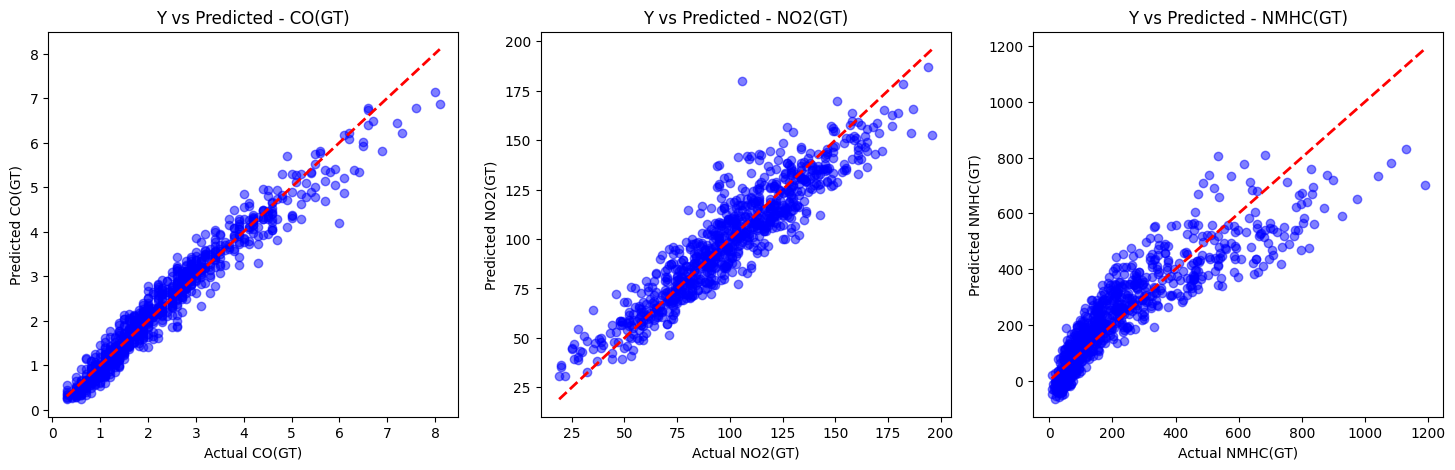

In [101]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(y.columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(y[col], pred_df.iloc[:, i], alpha=0.5, color="blue")
    plt.plot([y[col].min(), y[col].max()], 
             [y[col].min(), y[col].max()], "r--", linewidth=2)
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"Y vs Predicted - {col}")


plt.show()

In [102]:
results = {"Pollutant": [], "Model": [], "RMSE": [], "R2": []}

In [103]:
y_pred_lin = lr.predict(x_test)   # predict only on test data
# Linear Regression metrics
mse_lin = mean_squared_error(y_test.iloc[:, i], y_pred_lin[:, i])
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test.iloc[:, i], y_pred_lin[:, i])
results["Pollutant"].append(col)
results["Model"].append("Linear Regression")
results["RMSE"].append(rmse_lin)
results["R2"].append(r2_lin)


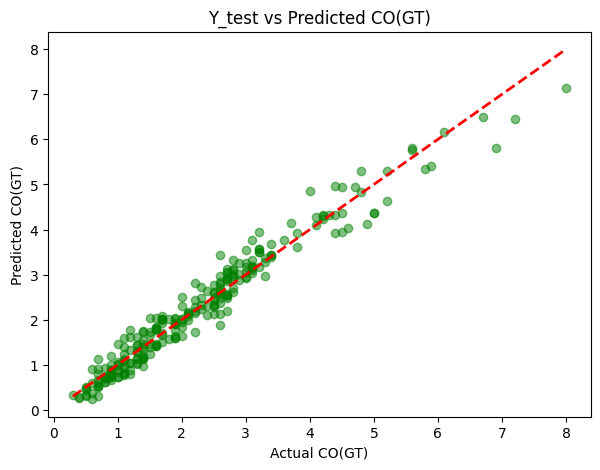

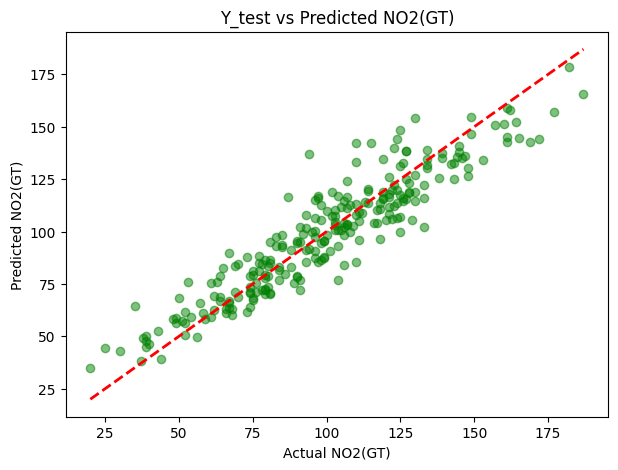

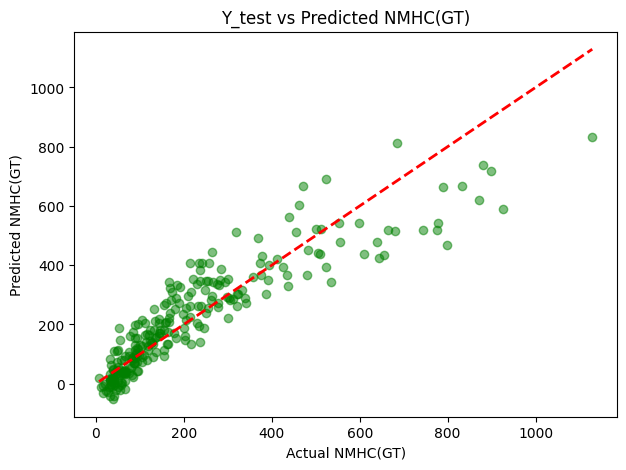

In [104]:
for i,col in enumerate(y.columns):
    plt.figure(figsize= (7,5))
    plt.scatter(y_test.iloc[:,i],y_pred_lin[:,i],alpha=0.5,color = "green")
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             "r--", linewidth=2)
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"Y_test vs Predicted {col}")
    plt.show()

In [105]:
df = pd.concat([df.reset_index(drop=True), pred_df], axis=1)

In [106]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Predicted_CO,Predicted_NO2,Predicted_NMHC
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3.173481,111.648145,288.824465
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2.787117,103.856873,231.355085
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2.804636,113.434809,155.664512
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2.744741,112.419620,164.052277
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2.139227,97.800635,94.988708


In [107]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
print("Score : ",knn_model.score(x_test,y_test))
y_pred_knn = knn_model.predict(x_test)

Score :  0.8832258223309667


In [108]:
for i, col in enumerate(y.columns):
    mse_knn = mean_squared_error(y_test.iloc[:, i], y_pred_knn[:, i])
    rmse_knn = np.sqrt(mse_knn)
    r2_knn = r2_score(y_test.iloc[:, i], y_pred_knn[:, i])
    results["Pollutant"].append(col)
    results["Model"].append("KNN Regression (k=5)")
    results["RMSE"].append(rmse_knn)
    results["R2"].append(r2_knn)
results_df = pd.DataFrame(results)
print(results_df)

  Pollutant                 Model       RMSE        R2
0  NMHC(GT)     Linear Regression  88.451992  0.816715
1    CO(GT)  KNN Regression (k=5)   0.324897  0.944814
2   NO2(GT)  KNN Regression (k=5)  13.101629  0.833054
3  NMHC(GT)  KNN Regression (k=5)  73.972902  0.871809


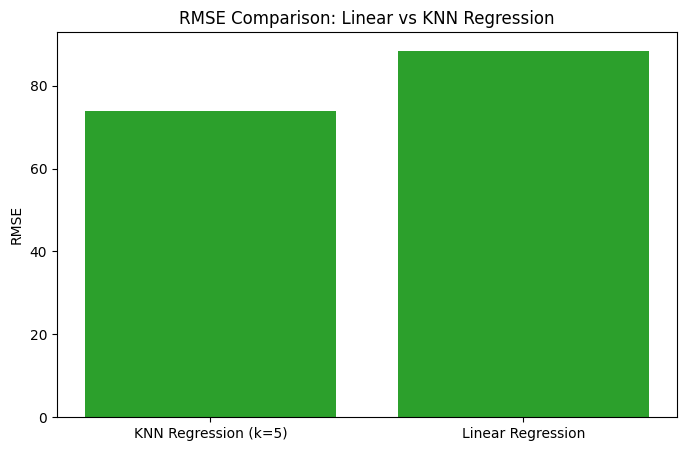

In [ ]:
plt.figure(figsize=(8,5))
for pollutant in y.columns:
    subset = results_df[results_df["Pollutant"] == pollutant]
    plt.bar(subset["Model"], subset["RMSE"], label=pollutant)
plt.title("RMSE Comparison: Linear vs KNN Regression")
plt.ylabel("RMSE")
plt.show()



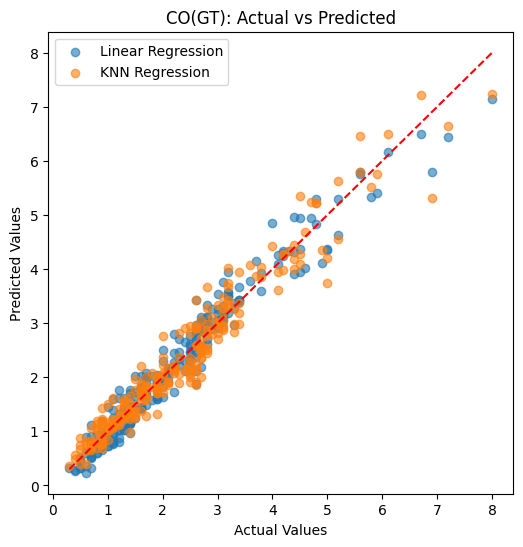

In [110]:
# Scatter plot: Actual vs Predicted for CO (example)
plt.figure(figsize=(6,6))
plt.scatter(y_test["CO(GT)"], y_pred_lin[:,0], alpha=0.6, label="Linear Regression")
plt.scatter(y_test["CO(GT)"], y_pred_knn[:,0], alpha=0.6, label="KNN Regression")
plt.plot([y_test["CO(GT)"].min(), y_test["CO(GT)"].max()],
         [y_test["CO(GT)"].min(), y_test["CO(GT)"].max()],
         "r--")  # Perfect prediction line
plt.title("CO(GT): Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [111]:
results = []

for i, col in enumerate(y.columns):
    # Linear Regression
    mse_lin = mean_squared_error(y_test.iloc[:, i], y_pred_lin[:, i])
    rmse_lin = np.sqrt(mse_lin)
    r2_lin = r2_score(y_test.iloc[:, i], y_pred_lin[:, i])
    
    # KNN Regression
    mse_knn = mean_squared_error(y_test.iloc[:, i], y_pred_knn[:, i])
    rmse_knn = np.sqrt(mse_knn)
    r2_knn = r2_score(y_test.iloc[:, i], y_pred_knn[:, i])
    
    results.append({
        "Pollutant": col,
        "Linear RMSE": rmse_lin,
        "Linear R²": r2_lin,
        "KNN RMSE": rmse_knn,
        "KNN R²": r2_knn
    })

    results_df = pd.DataFrame(results)
print("\n🔹 Model Comparison Results:")
print(results_df)


🔹 Model Comparison Results:
  Pollutant  Linear RMSE  Linear R²   KNN RMSE    KNN R²
0    CO(GT)     0.291171   0.955677   0.324897  0.944814
1   NO2(GT)    11.885894   0.862599  13.101629  0.833054
2  NMHC(GT)    88.451992   0.816715  73.972902  0.871809


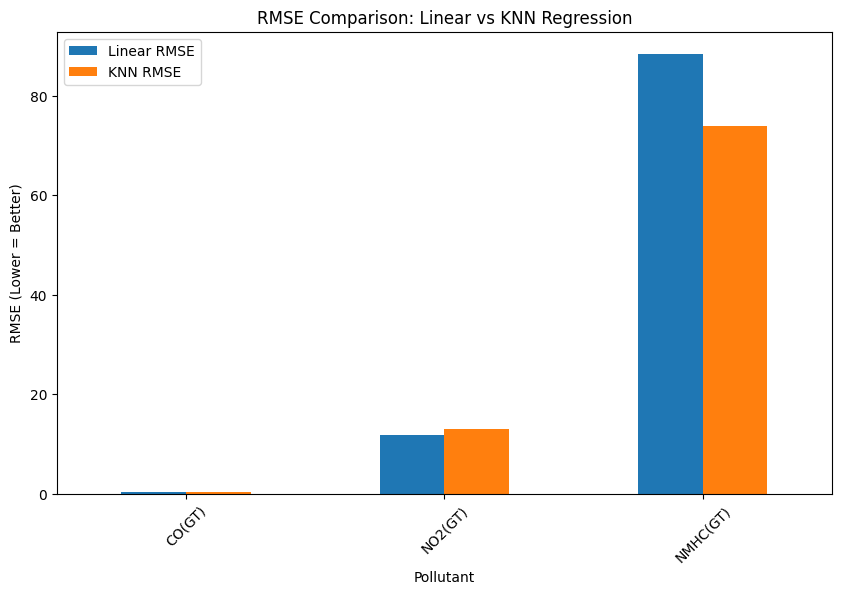

In [112]:
results_df.plot(
    x="Pollutant",
    y=["Linear RMSE", "KNN RMSE"],
    kind="bar",
    figsize=(10, 6)
)
plt.title("RMSE Comparison: Linear vs KNN Regression")
plt.ylabel("RMSE (Lower = Better)")
plt.xticks(rotation=45)
plt.show()


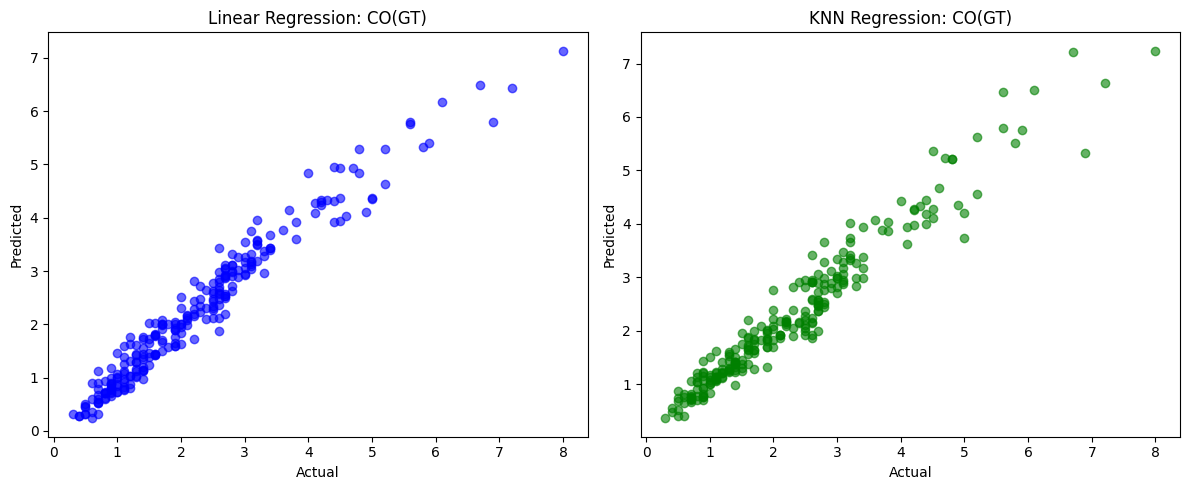

In [113]:
pollutant = y.columns[0]

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[:,0], y_pred_lin[:,0], alpha=0.6, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Linear Regression: {pollutant}")

plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[:,0], y_pred_knn[:,0], alpha=0.6, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"KNN Regression: {pollutant}")

plt.tight_layout()
plt.show()